<a href="https://colab.research.google.com/github/intimanjunath/Data-preparation-eda-visualizatoin/blob/main/tabular_diverse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dowloading Kaggle data

In [4]:
!pip install kaggle

In [5]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"manjunathainti","key":"bf164ab64c4d004775a8ab8dcda6640a"}'}

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

Dataset URL: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data
License(s): CC0-1.0
new-york-city-airbnb-open-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!unzip new-york-city-airbnb-open-data.zip

Archive:  new-york-city-airbnb-open-data.zip
replace AB_NYC_2019.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace New_York_City_.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: no


Step 1: Install Necessary Libraries

In [9]:
# Importing essential libraries for data processing and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings("ignore")

Step 2: Load the Dataset


In [10]:
# Load dataset
data = pd.read_csv('AB_NYC_2019.csv')  # Replace with the actual path if different

# Display basic info and first few rows
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington     40.65     -73.97   
1     Jennifer           Manhattan       Midtown     40.75     -73.98   
2    Elisabeth           Manhattan        Harlem     40.81     -73.94   
3  LisaRoxanne            Brooklyn  Clinton Hill     40.69     -73.96   
4        Laura           Manhattan   East Harlem     40.80     -73.94   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

Step 3: Generate EDA Report


In [11]:
print(data.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [12]:
# Install sweetviz if you haven't already:
!pip install sweetviz

# Import the sweetviz library
import sweetviz as sv

# Creating an EDA report with Sweetviz to analyze data insights automatically
eda_report = sv.analyze(data)
eda_report.show_html("NYC_Taxi_EDA_Report.html") # Saves as an HTML file for download and offline viewing

INFO: pip is looking at multiple versions of contourpy to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 10.6 MB/s eta 0:00:00
  Attempting uninstall: contourpy
    Found existing installation: contourpy 1.3.1
    Uninstalling contourpy-1.3.1:
      Successfully uninstalled contourpy-1.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
plotnine 0.14.1 requires numpy>=1.23.5, but you have numpy 1.22.4 which is incompatible.
plotnine 0.14.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.1 requires scipy>=1.8.0, but you have scipy 1.7.3 which is incompatible.


                                             |          | [  0%]   00:00 -> (? left)

Report NYC_Taxi_EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Step 5: Handle Missing Data and Outliers


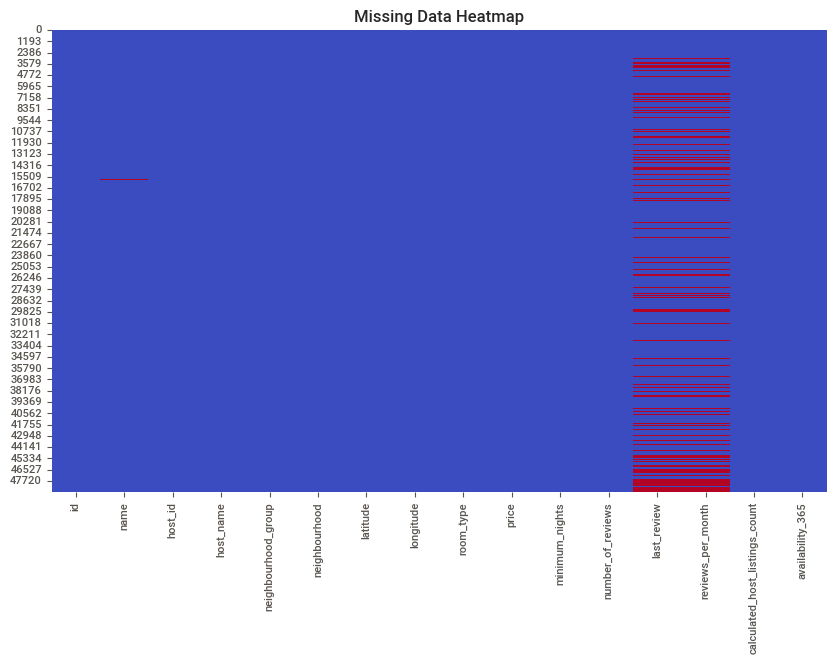

In [13]:
# Visualizing missing data to identify gaps
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='coolwarm')
plt.title('Missing Data Heatmap')
plt.show()

# Impute missing values for the 'price' column with median values
imputer = SimpleImputer(strategy="median")
data[['price']] = imputer.fit_transform(data[['price']])

# Dropping rows with missing values in essential columns
data.dropna(subset=['name', 'host_name'], inplace=True)

##Step 6: Data Visualization
Visualization 1: Distribution of Prices

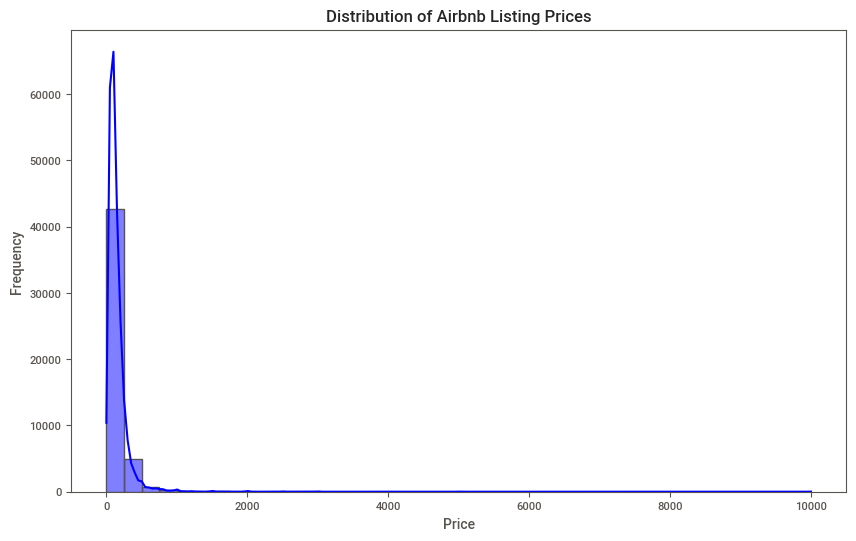

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=40, kde=True, color='blue')
plt.title("Distribution of Airbnb Listing Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

Visualization 2: Average Price by Neighborhood Group


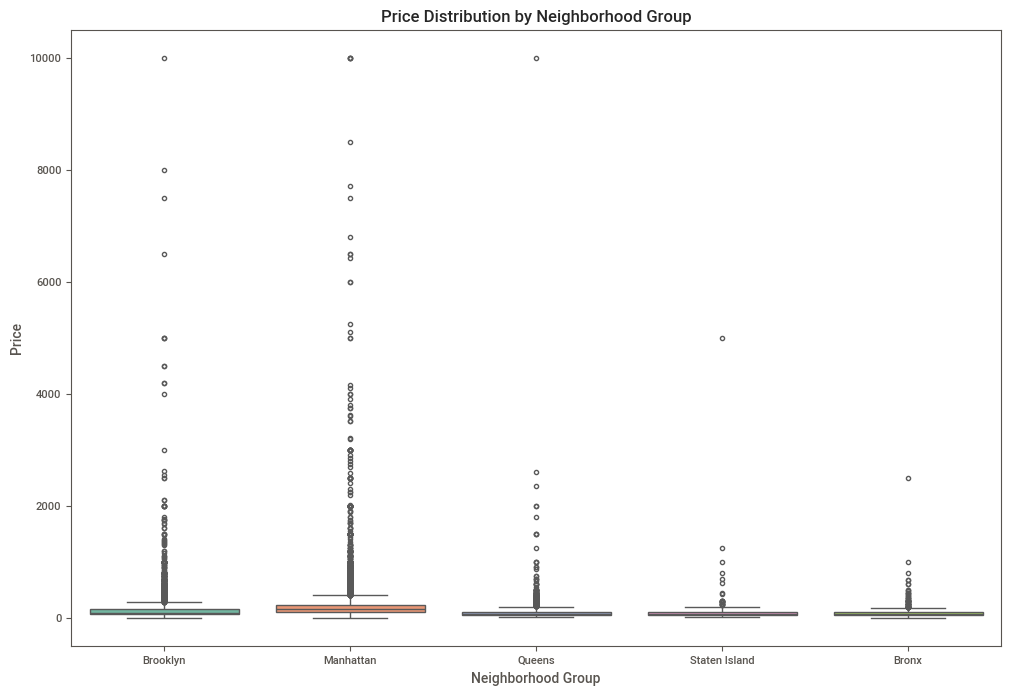

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood_group', y='price', data=data, palette='Set2')
plt.title("Price Distribution by Neighborhood Group")
plt.xlabel("Neighborhood Group")
plt.ylabel("Price")
plt.show()

Visualization 3: Number of Reviews vs Price

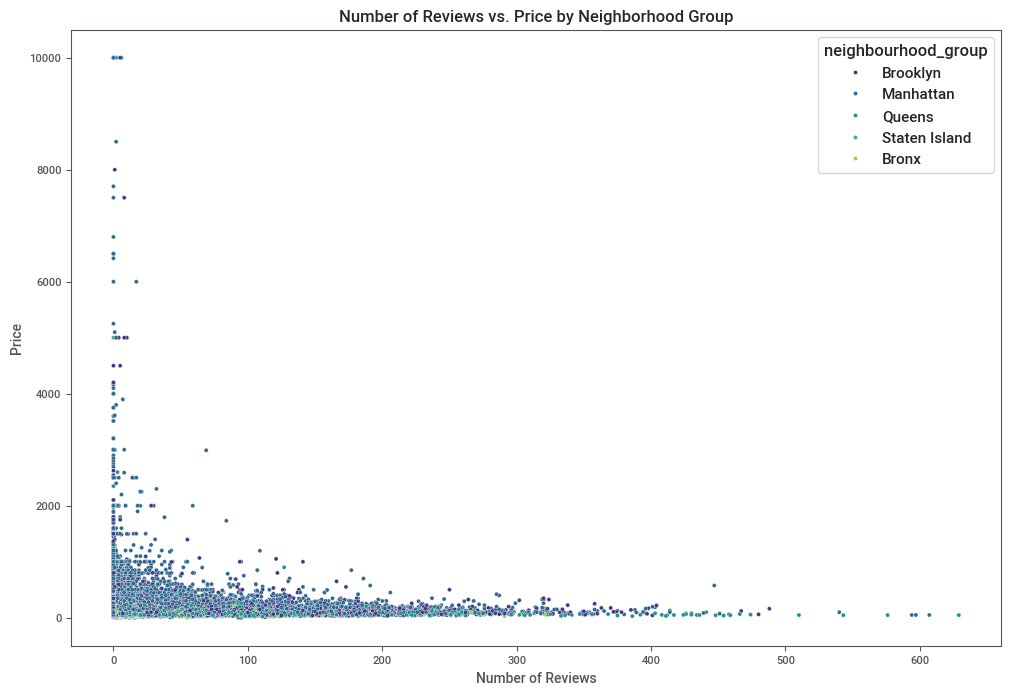

In [16]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='number_of_reviews', y='price', data=data, hue='neighbourhood_group', palette='viridis')
plt.title("Number of Reviews vs. Price by Neighborhood Group")
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.show()

#Step 7: Encoding and Feature Scaling
Step 7.1: Encoding Categorical Variables

In [17]:
from sklearn.preprocessing import LabelEncoder

# Encoding 'neighbourhood_group' and 'room_type' using Label Encoding
label_encoder = LabelEncoder()
data['neighbourhood_group'] = label_encoder.fit_transform(data['neighbourhood_group'])
data['room_type'] = label_encoder.fit_transform(data['room_type'])

Step 7.2: Standardizing Numeric Features

In [18]:
from sklearn.preprocessing import StandardScaler

# Scaling numerical features
scaler = StandardScaler()
data[['price', 'minimum_nights', 'number_of_reviews']] = scaler.fit_transform(data[['price', 'minimum_nights', 'number_of_reviews']])

Step 7.3: Insert Feature Selection

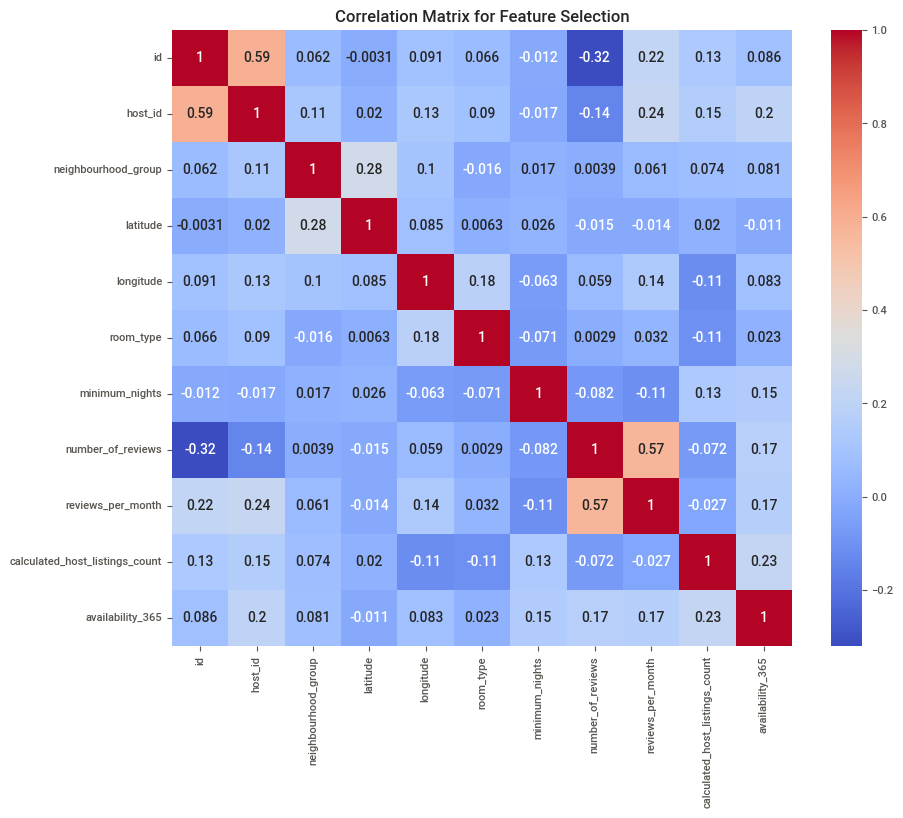

Selected Features: Index(['id', 'host_id', 'latitude', 'longitude', 'room_type', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


In [19]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE, VarianceThreshold # Import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
# Define the target variable
target_variable = 'price'  # Make sure this matches your actual target variable name

# Select only numeric columns for feature selection, excluding the target
numeric_data = data.select_dtypes(include=[np.number]).drop(columns=[target_variable])

# Impute missing values in numeric_data
imputer = SimpleImputer(strategy="median")
numeric_data_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)

# Display correlation matrix to find relationships between features
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data_imputed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Feature Selection")
plt.show()

# Remove low-variance features
selector = VarianceThreshold(threshold=0.1) # Now VarianceThreshold is defined
data_high_variance = selector.fit_transform(numeric_data_imputed)

# Recursive Feature Elimination (RFE) for feature importance
model = RandomForestRegressor()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(numeric_data_imputed, data[target_variable])
selected_features = numeric_data_imputed.columns[rfe.support_]
print("Selected Features:", selected_features)

Step 8: Clustering and Anomaly Detection

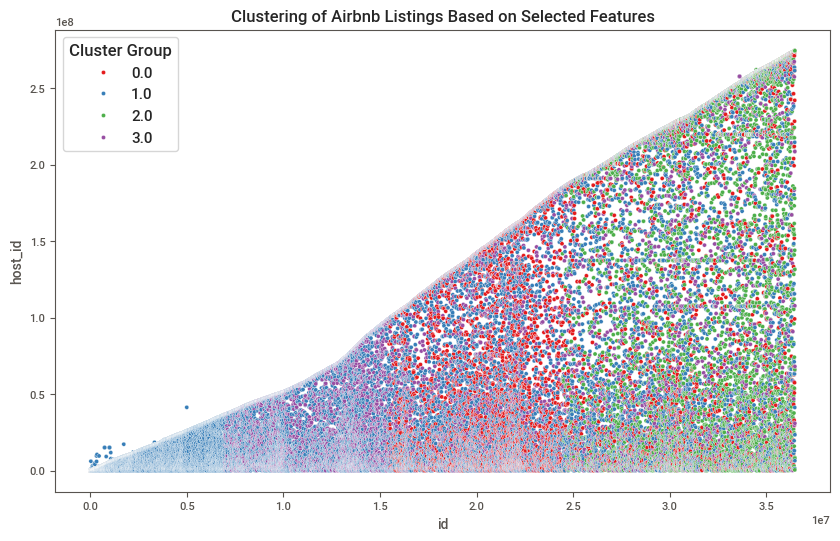

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# Impute missing values in selected features
imputer = SimpleImputer(strategy="median")
data_imputed = pd.DataFrame(imputer.fit_transform(data[selected_features]), columns=selected_features)

# Perform KMeans clustering with 4 clusters (adjust as needed)
kmeans_model = KMeans(n_clusters=4, random_state=42)
data['cluster_group'] = kmeans_model.fit_predict(data_imputed)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_imputed[selected_features[0]], y=data_imputed[selected_features[1]], hue='cluster_group', data=data, palette='Set1')
plt.title("Clustering of Airbnb Listings Based on Selected Features")
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.legend(title='Cluster Group')
plt.show()


Step 8.2: Anomaly Detection with Isolation Forest

Detected Anomalies in the Dataset:
       id                                 name  host_id        host_name  \
3    3831      Cozy Entire Floor of Brownstone     4869      LisaRoxanne   
7    5178     Large Furnished Room Near B'way      8967         Shunichi   
30   9668                front room/double bed    32294  Ssameer Or Trip   
33   9783                  back room/bunk beds    32294  Ssameer Or Trip   
39  12048  LowerEastSide apt share shortterm 1     7549              Ben   

    neighbourhood_group    neighbourhood  latitude  longitude  room_type  \
3                     1     Clinton Hill     40.69     -73.96          0   
7                     2   Hell's Kitchen     40.76     -73.98          1   
30                    2           Harlem     40.82     -73.95          1   
33                    2           Harlem     40.82     -73.95          1   
39                    2  Lower East Side     40.71     -73.99          2   

    price  minimum_nights  number_of_reviews last_r

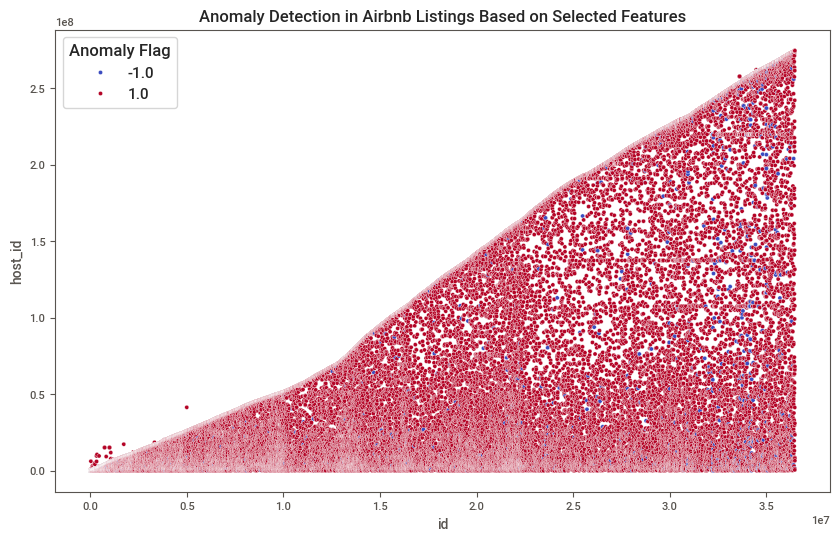

In [21]:
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

# Impute missing values in selected features for Isolation Forest
imputer = SimpleImputer(strategy="median")
data_imputed = pd.DataFrame(imputer.fit_transform(data[selected_features]), columns=selected_features)

# Fit Isolation Forest to detect anomalies
iso_forest_model = IsolationForest(contamination=0.03, random_state=42)
data['anomaly_flag'] = iso_forest_model.fit_predict(data_imputed)

# Display a few anomalies for inspection
print("Detected Anomalies in the Dataset:")
print(data[data['anomaly_flag'] == -1].head())

# Visualize anomalies in the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_imputed[selected_features[0]], y=data_imputed[selected_features[1]], hue='anomaly_flag', data=data, palette='coolwarm')
plt.title("Anomaly Detection in Airbnb Listings Based on Selected Features")
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.legend(title='Anomaly Flag')
plt.show()


#Step 9: Model Building and Evaluation

In [22]:
from sklearn.model_selection import train_test_split

# Define the target variable
target = 'price'

# Define features (exclude target and unnecessary columns)
X = data[selected_features]  # Use previously selected features
y = data[target]

# Split into training and testing data (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)


Training Features Shape: (39086, 10)
Testing Features Shape: (9772, 10)


In [23]:
from sklearn.impute import SimpleImputer

# Define the imputer with median strategy
imputer = SimpleImputer(strategy='median')

# Impute missing values in the 'reviews_per_month' column for both train and test sets
X_train['reviews_per_month'] = imputer.fit_transform(X_train[['reviews_per_month']])
X_test['reviews_per_month'] = imputer.transform(X_test[['reviews_per_month']])

# Verify that there are no missing values
print("Missing values in X_train after imputation:")
print(X_train.isnull().sum())

print("Missing values in X_test after imputation:")
print(X_test.isnull().sum())


Missing values in X_train after imputation:
id                                0
host_id                           0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64
Missing values in X_test after imputation:
id                                0
host_id                           0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("Linear Regression Performance:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression Performance:
R² Score: 0.0914942042360527
RMSE: 0.8913360304700888


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Regressor Performance:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest Regressor Performance:
R² Score: 0.11835931020728552
RMSE: 0.8780584447584208


In [26]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Regressor Performance:")
print("R² Score:", r2_score(y_test, y_pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gb)))


Gradient Boosting Regressor Performance:
R² Score: 0.16958208096369565
RMSE: 0.8521694625731238


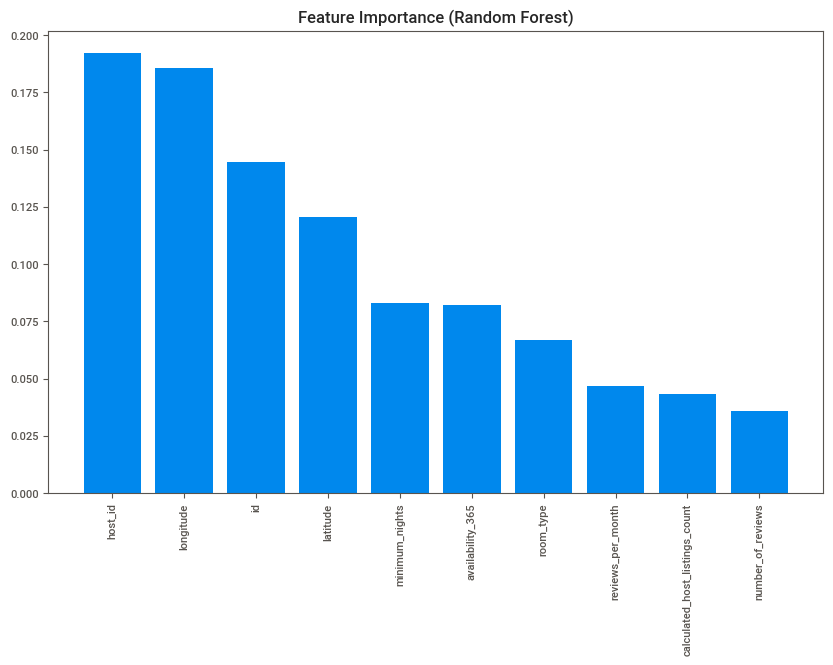

In [27]:
# Feature importance from Random Forest
importances = rf_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_indices)), importances[sorted_indices], align="center")
plt.xticks(range(len(sorted_indices)), [X_train.columns[i] for i in sorted_indices], rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.show()

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer # Import SimpleImputer for imputation

# Assuming X_train contains your original training data
# Create an imputer to fill missing values (e.g., with the mean)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Narrower search space for Random Forest hyperparameters
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10]
}

rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=3, scoring='r2', verbose=2)
rf_grid_search.fit(X_train_imputed, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   5.8s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   4.9s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   5.5s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=  10.2s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=  10.7s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=  10.8s
[CV] END max_depth=10, min_samples_split=10, n_estimators=50; total time=   4.9s
[CV] END max_depth=10, min_samples_split=10, n_estimators=50; total time=   6.6s
[CV] END max_depth=10, min_samples_split=10, n_estimators=50; total time=   4.9s
[CV] END max_depth=10, min_samples_split=10, n_estimators=100; total time=  10.6s
[CV] END max_depth=10, min_samples_split=10, n_estimators=100; total time=  10.7s
[CV] END max_depth=10, min_samples_split=10, n_

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20], 'min_samples_split': [5, 10],
                         'n_estimators': [50, 100]},
             scoring='r2', verbose=2)

In [29]:
#feature engineering
# Feature: Price per guest
data['price_per_guest'] = data['price'] / data['calculated_host_listings_count']

# Feature: Stay duration bucket
data['stay_duration_bucket'] = pd.cut(data['minimum_nights'], bins=[0, 3, 7, 14, 30, 1000],
                                      labels=['Short', 'Week', 'Two Weeks', 'Month', 'Long Term'])

# Feature: Price category (e.g., Low, Medium, High)
data['price_category'] = pd.qcut(data['price'], q=3, labels=['Low', 'Medium', 'High'])

# Interaction Features: Multiplying important columns to create new insights
data['room_reviews_interaction'] = data['number_of_reviews'] * data['room_type']

# Verify the new features
print(data[['price_per_guest', 'stay_duration_bucket', 'price_category', 'room_reviews_interaction']].head())


   price_per_guest stay_duration_bucket price_category  \
0            -0.00                  NaN         Medium   
1             0.15                  NaN           High   
2            -0.01                  NaN         Medium   
3            -0.27                  NaN         Medium   
4            -0.30                Short            Low   

   room_reviews_interaction  
0                     -0.32  
1                      0.00  
2                     -0.52  
3                      0.00  
4                     -0.00  


Silhouette Score for KMeans: 0.5664484136565789


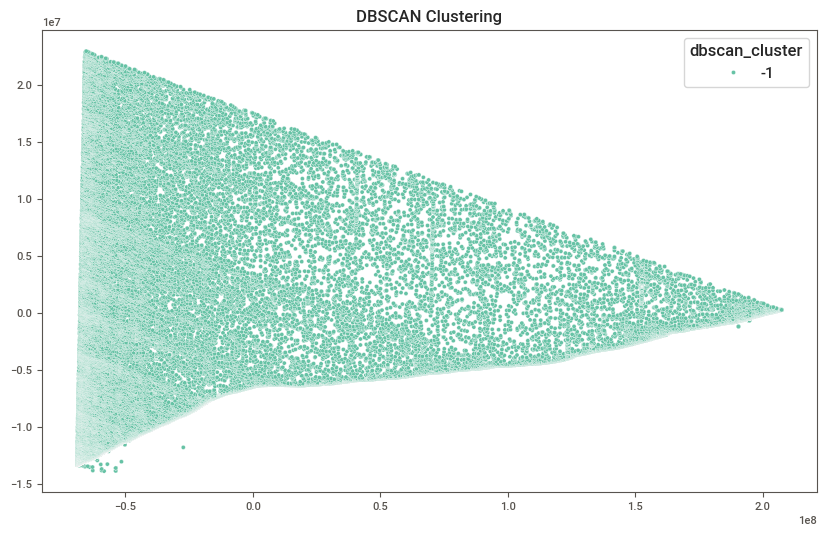

In [30]:
#Clustering Evaluation and Optimization
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Evaluate KMeans clustering with silhouette score
silhouette_avg = silhouette_score(data_imputed, data['cluster_group'])
print(f"Silhouette Score for KMeans: {silhouette_avg}")

# Dimensionality reduction for DBSCAN clustering
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_imputed)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['dbscan_cluster'] = dbscan.fit_predict(data_pca)

# Visualize DBSCAN clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data['dbscan_cluster'], palette='Set2')
plt.title("DBSCAN Clustering")
plt.show()


In [31]:
#Anomaly Detection with Local Outlier Factor (LOF)
from sklearn.neighbors import LocalOutlierFactor

# Fit LOF for anomaly detection
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.03)
data['lof_anomaly_flag'] = lof.fit_predict(data_imputed)

# Compare LOF and Isolation Forest
lof_anomalies = data[data['lof_anomaly_flag'] == -1]
iso_forest_anomalies = data[data['anomaly_flag'] == -1]

print(f"Number of anomalies detected by LOF: {len(lof_anomalies)}")
print(f"Number of anomalies detected by Isolation Forest: {len(iso_forest_anomalies)}")


Number of anomalies detected by LOF: 1466
Number of anomalies detected by Isolation Forest: 1466


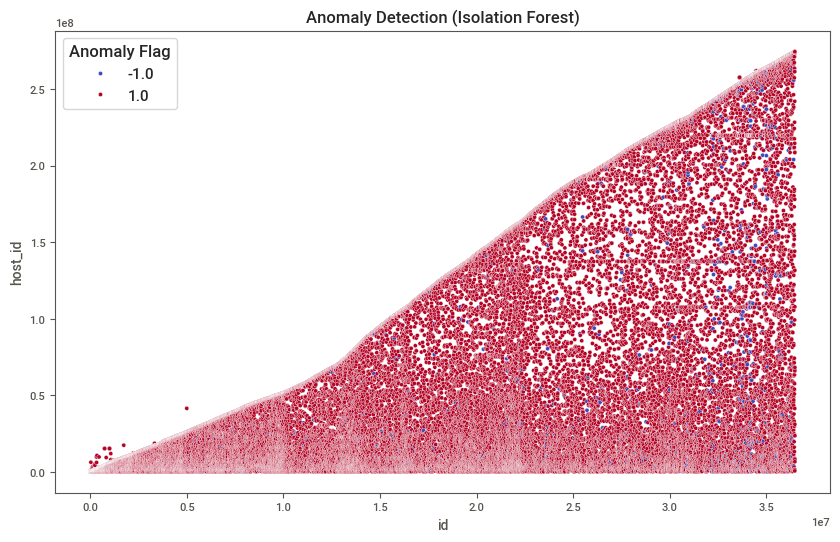

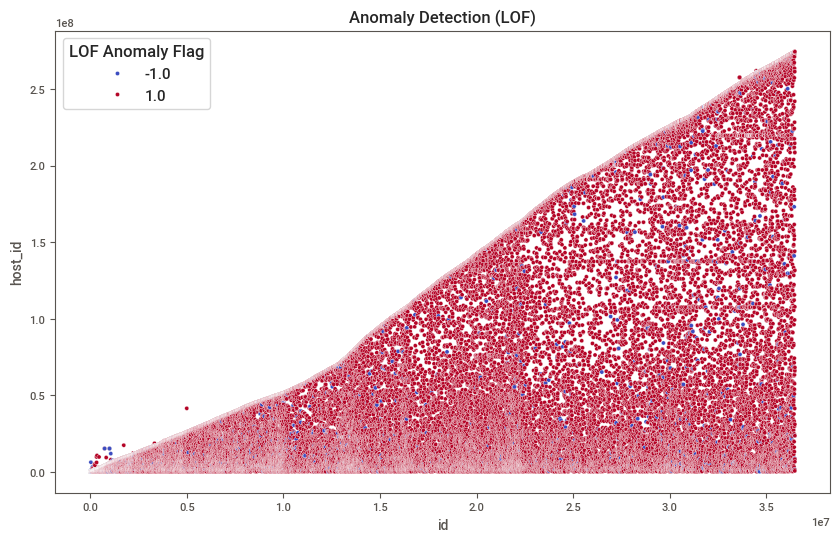

In [32]:
# Visualize anomalies detected by Isolation Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_imputed[selected_features[0]],
                y=data_imputed[selected_features[1]],
                hue=data['anomaly_flag'],
                palette='coolwarm')
plt.title("Anomaly Detection (Isolation Forest)")
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.legend(title='Anomaly Flag')
plt.show()

# Visualize anomalies detected by Local Outlier Factor (LOF)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_imputed[selected_features[0]],
                y=data_imputed[selected_features[1]],
                hue=data['lof_anomaly_flag'],
                palette='coolwarm')
plt.title("Anomaly Detection (LOF)")
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.legend(title='LOF Anomaly Flag')
plt.show()


In [33]:
# Keep only non-anomalous data points for Isolation Forest
data_no_anomalies_if = data[data['anomaly_flag'] != -1]

# Keep only non-anomalous data points for LOF
data_no_anomalies_lof = data[data['lof_anomaly_flag'] != -1]

# Display the remaining dataset sizes
print(f"Dataset size after removing anomalies (Isolation Forest): {data_no_anomalies_if.shape}")
print(f"Dataset size after removing anomalies (LOF): {data_no_anomalies_lof.shape}")

# Use the preferred method (e.g., Isolation Forest) for further analysis
data_cleaned = data_no_anomalies_if  # Choose based on model evaluation or domain knowledge

Dataset size after removing anomalies (Isolation Forest): (47392, 24)
Dataset size after removing anomalies (LOF): (47392, 24)


In [39]:
# Install AutoVIML for AutoML
!pip install autoviml
!pip install lightgbm xgboost nltk pandas numpy scikit-learn matplotlib seaborn

In [40]:
# Import AutoVIML
from autoviml.Auto_ViML import Auto_ViML

In [41]:
# Use cleaned data after anomaly removal
auto_data = data_cleaned  # Assuming `data_cleaned` is your cleaned dataset

==================== System Information ====================
System: Linux
Node Name: 3def57dc4444
Release: 6.1.85+
Version: #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
Machine: x86_64
Processor: x86_64
====================== CPU Information ======================
Physical cores: 1
Total cores: 2
==================== Memory Information ====================
Total: 12.67GB
Available: 9.02GB
Used: 3.34GB
##############  D A T A   S E T  A N A L Y S I S  #######################
ALERT! Changing hyperparameter search to RS. Otherwise, Random Forests will take too long for 10,000+ rows
Training Set Shape = (47392, 24)
    Training Set Memory Usage = 9.23 MB
Single_Label Target: ['price']
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  #######

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

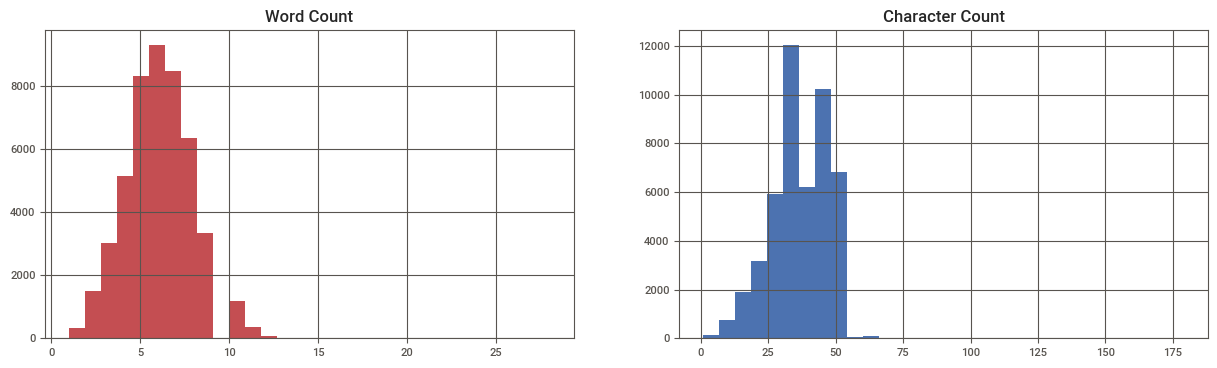

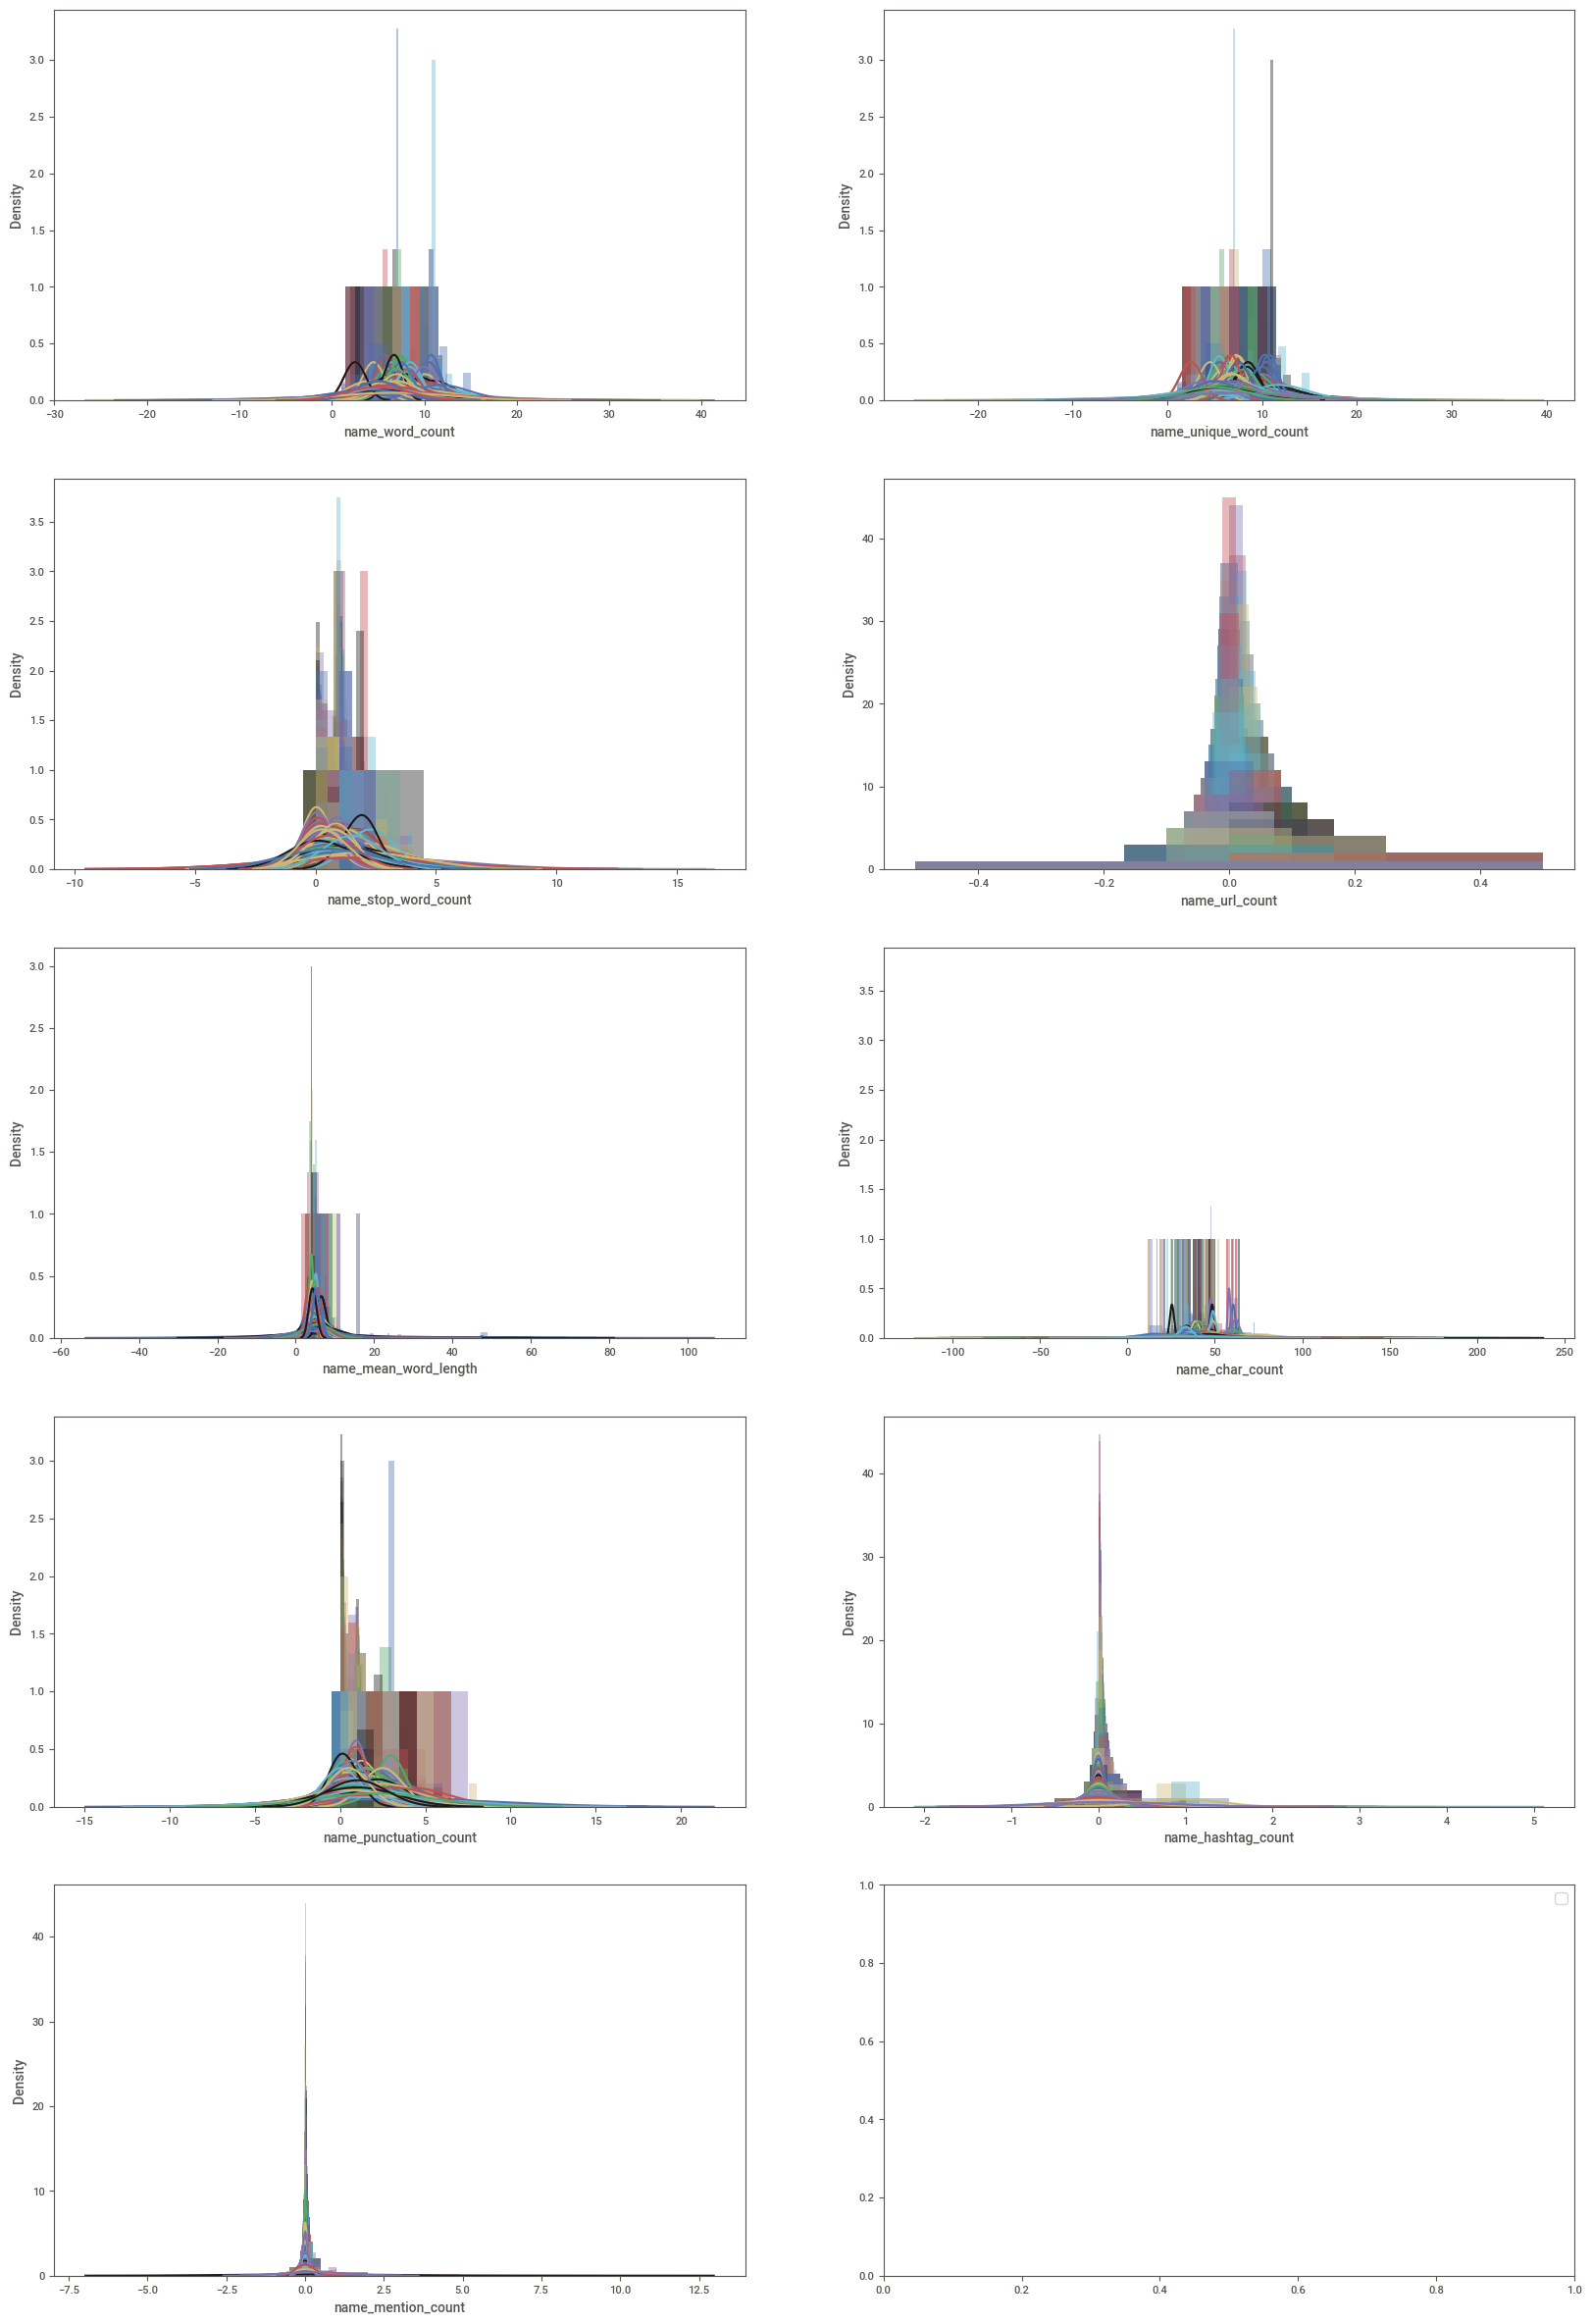

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for name column
    Faster text processing using clean_tweets function, since top_num_features exceeds 300
Train data Text cleaning completed. Time taken = 122 seconds
##################    THIS IS FOR BUILD_MODEL = FALSE           #################
Building Model and Pipeline for NLP column = name. This will take time...
    Selected the maximum number of features limit = 5000
Performing RandomizedSearchCV across 30 params. Optimizing for neg_mean_squared_error
    Using train data = (37913,) and Cross Validation data = (9479,)
Since top_num_features = 300, selecting LightGBM Regressor model. If you need different model, decrease it <300.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.137407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total

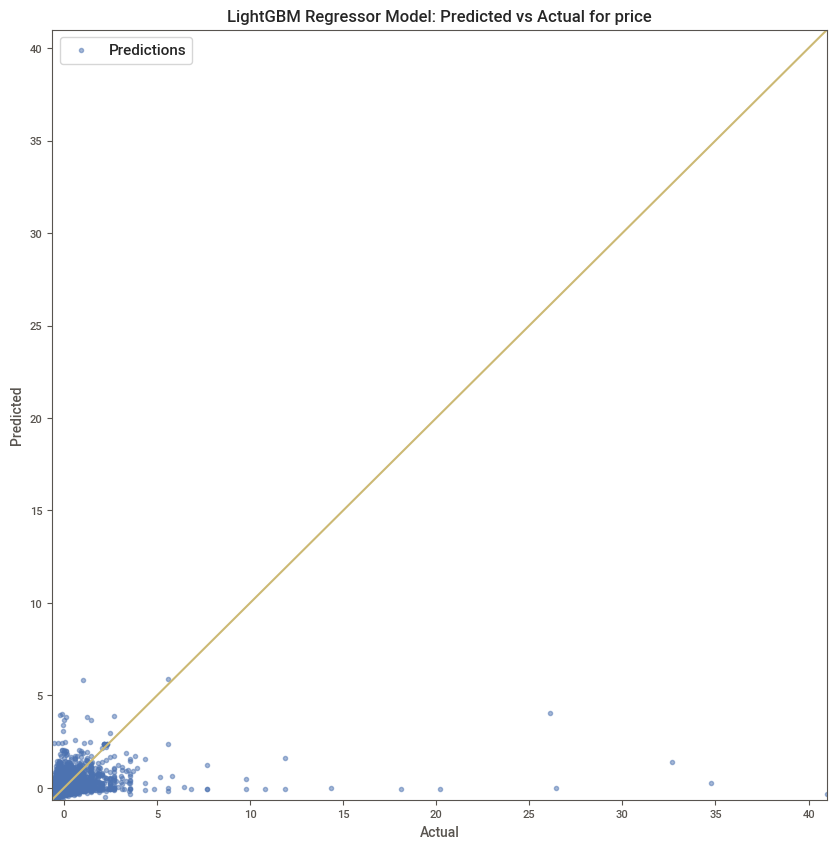

    MAE = 0.3157
    MAPE = 210%
    RMSE = 0.9712
    MAE as % std dev of Actuals = 33.7%
    Normalized RMSE (% of MinMax of Actuals) = 2%
    Normalized RMSE (% of Std Dev of Actuals) = 96%
  Now transforming Train data to return as output...
###    AFTER BEST NLP TRANSFORMER SELECTED, NOW ENRICH TEXT DATA  ##############
    Now transforming NLP_column for train and test data using best vectorizer...
Reducing dimensions from 1073 term-matrix to 32 dimensions using TruncatedSVD...
    Reduced dimensional array shape to (47392, 32)
    Time Taken for Truncated SVD = 1 seconds
TruncatedSVD Data Frame size = (47392, 32)
Creating word clusters using term matrix of shape: (47392, 32) from Train data set...
    Running k-means on NLP token matrix to create 2 word clusters.
    Created one new column: name_word_cluster_name using KMeans_Clusters on NLP transformed columns...
    Time Taken for creating word cluster labels  = 3 seconds
Since samples in data > 10000 using TextBlob, which is 

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

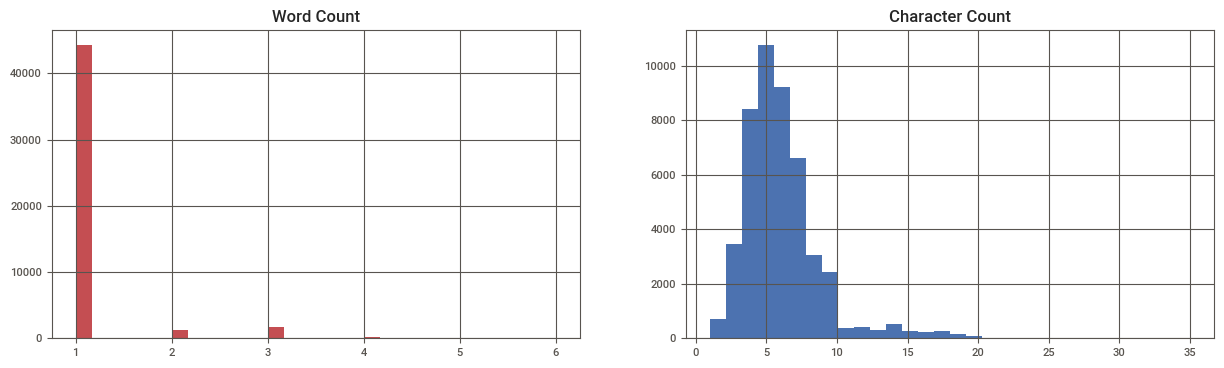

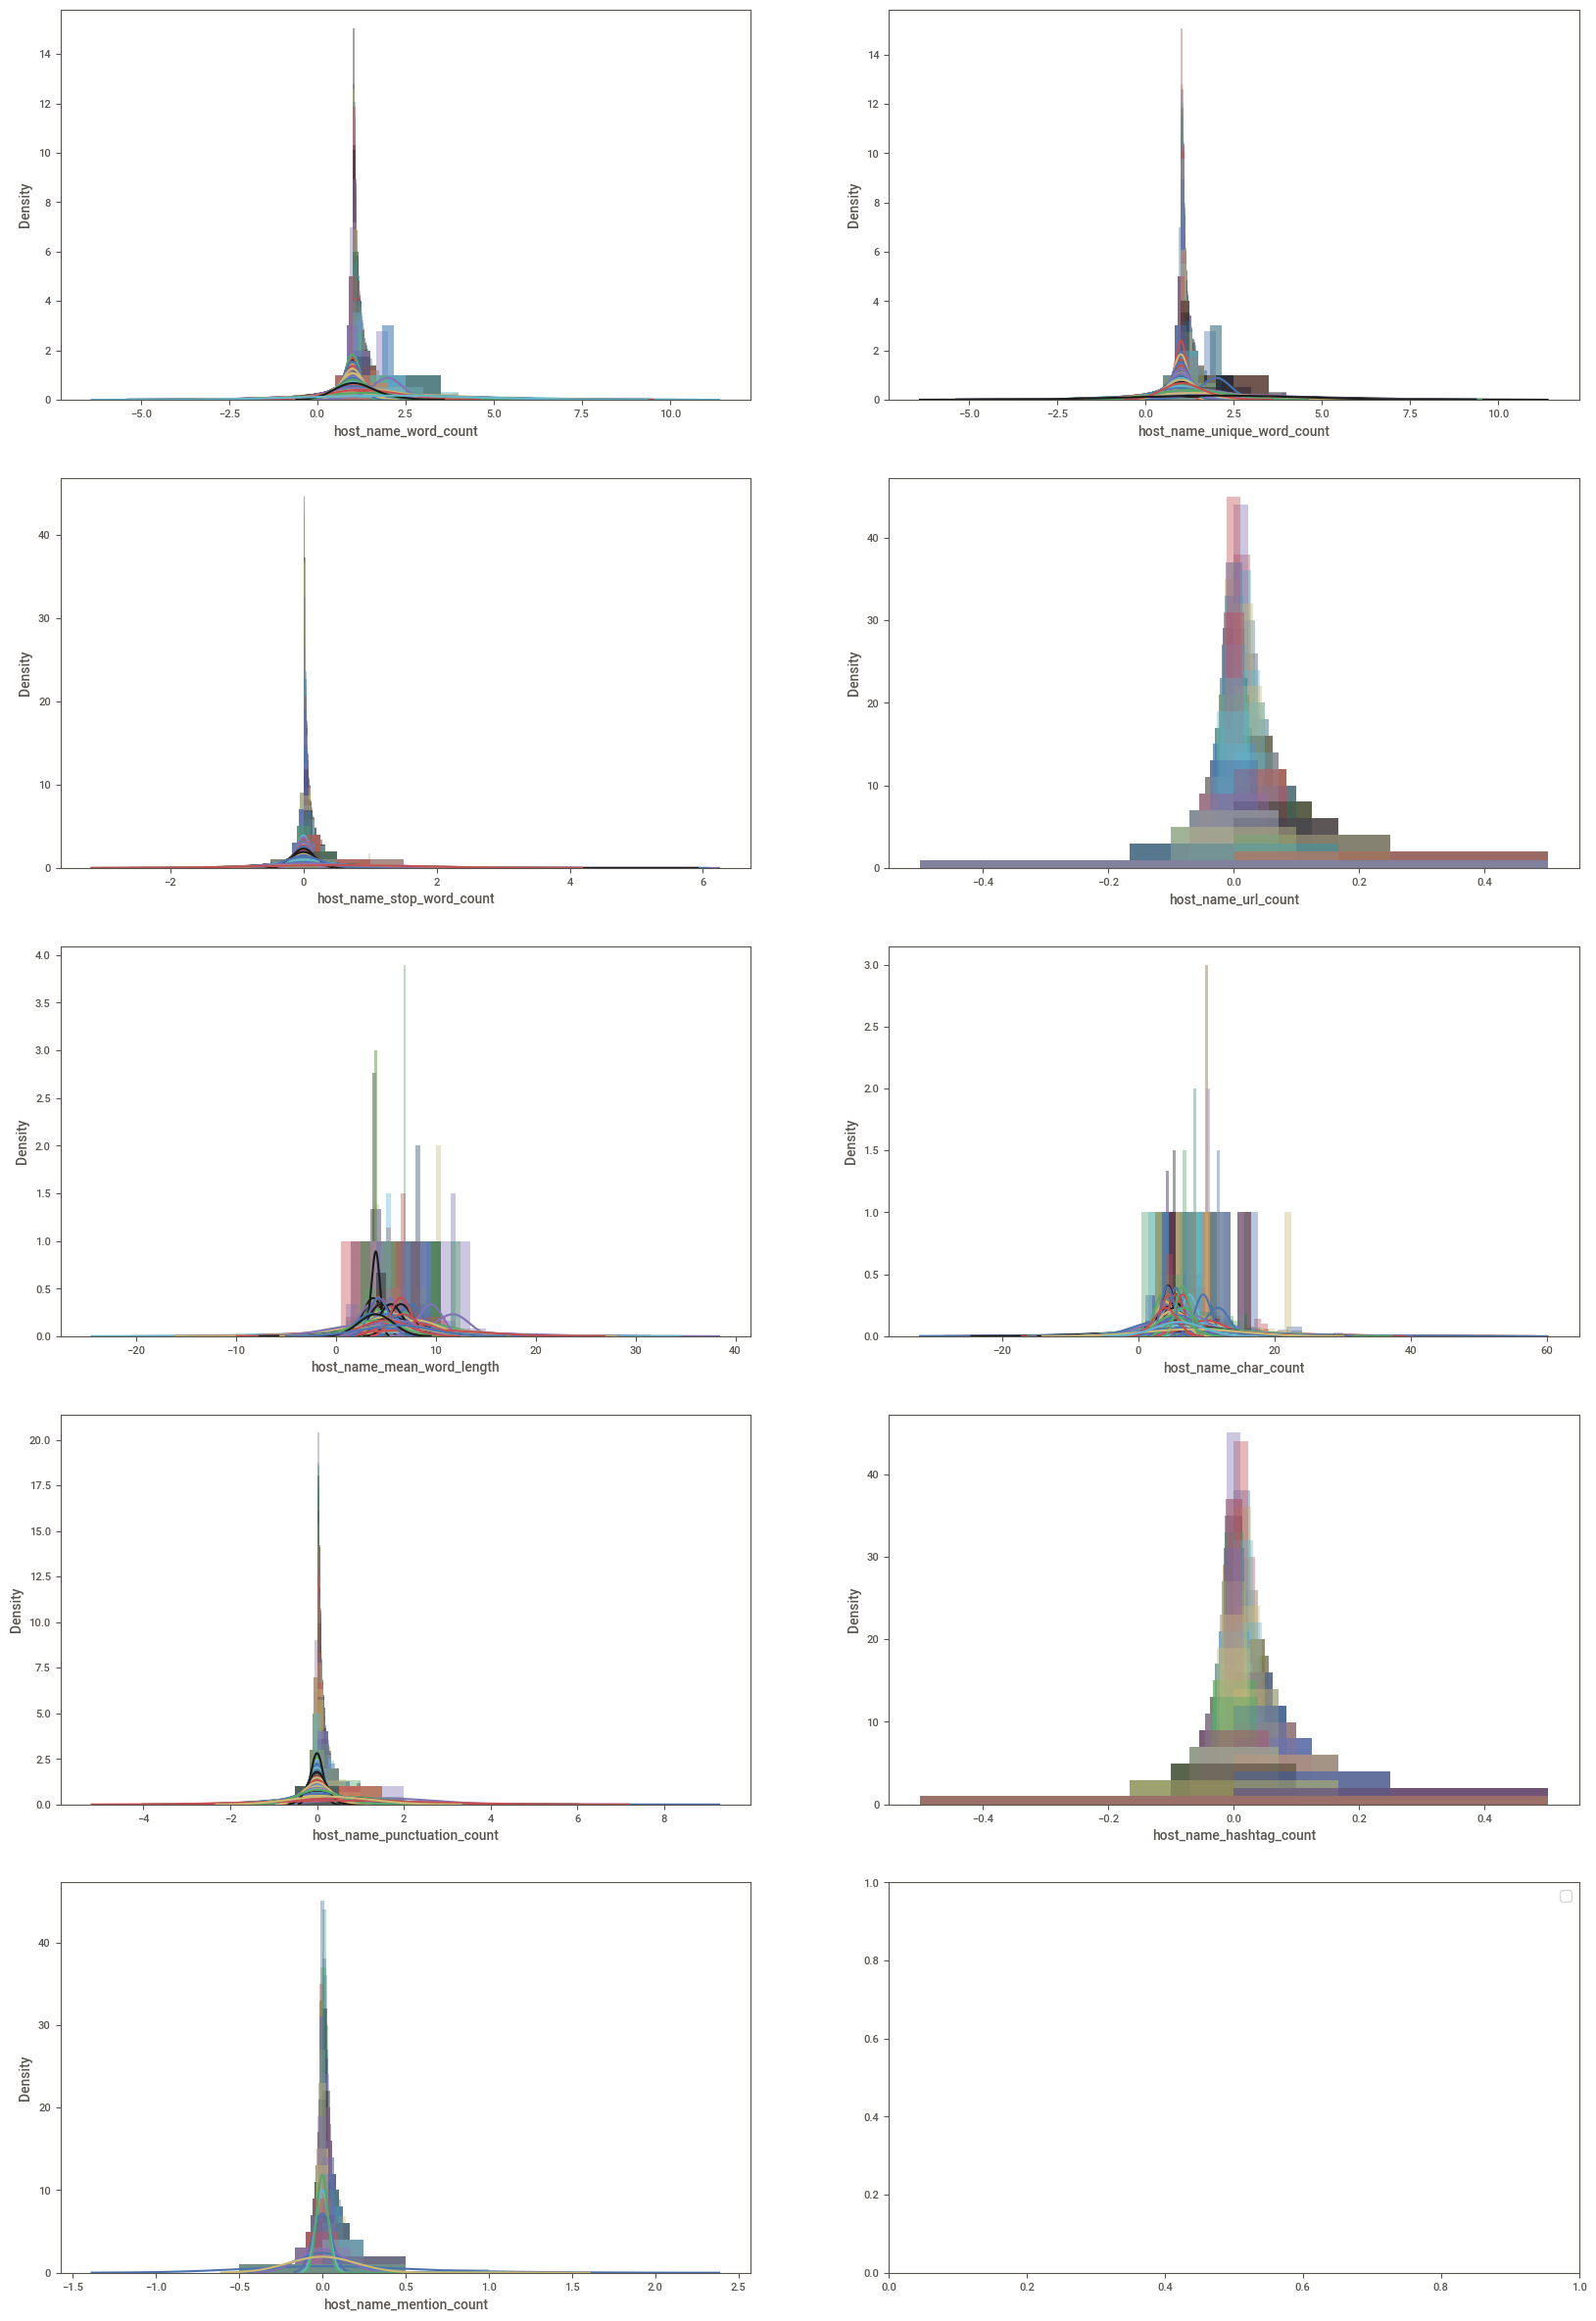

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for host_name column
    Faster text processing using clean_tweets function, since top_num_features exceeds 300
Train data Text cleaning completed. Time taken = 108 seconds
##################    THIS IS FOR BUILD_MODEL = FALSE           #################
Building Model and Pipeline for NLP column = host_name. This will take time...
    Selected the maximum number of features limit = 4074
Performing RandomizedSearchCV across 30 params. Optimizing for neg_mean_squared_error
    Using train data = (37913,) and Cross Validation data = (9479,)
Since top_num_features = 300, selecting LightGBM Regressor model. If you need different model, decrease it <300.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.097569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [I

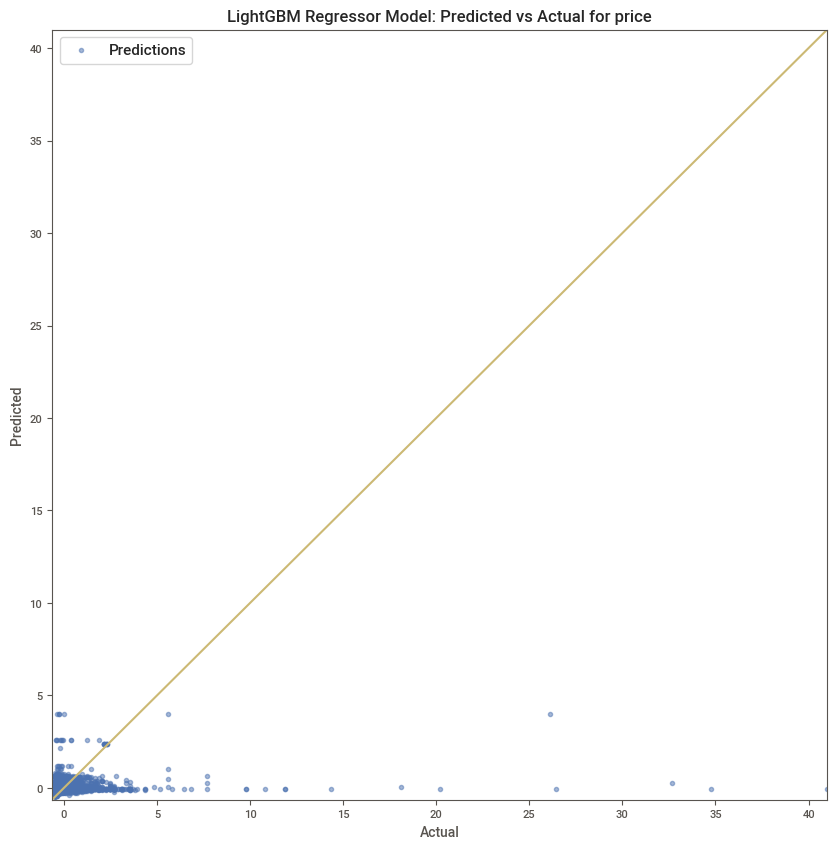

    MAE = 0.3738
    MAPE = 140%
    RMSE = 1.0036
    MAE as % std dev of Actuals = 39.9%
    Normalized RMSE (% of MinMax of Actuals) = 2%
    Normalized RMSE (% of Std Dev of Actuals) = 99%
  Now transforming Train data to return as output...
###    AFTER BEST NLP TRANSFORMER SELECTED, NOW ENRICH TEXT DATA  ##############
    Now transforming NLP_column for train and test data using best vectorizer...
Reducing dimensions from 2119 term-matrix to 46 dimensions using TruncatedSVD...
    Reduced dimensional array shape to (47392, 46)
    Time Taken for Truncated SVD = 1 seconds
TruncatedSVD Data Frame size = (47392, 46)
Creating word clusters using term matrix of shape: (47392, 46) from Train data set...
    Running k-means on NLP token matrix to create 3 word clusters.
    Created one new column: host_name_word_cluster_host_name using KMeans_Clusters on NLP transformed columns...
    Time Taken for creating word cluster labels  = 3 seconds
Since samples in data > 10000 using TextBlob,

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

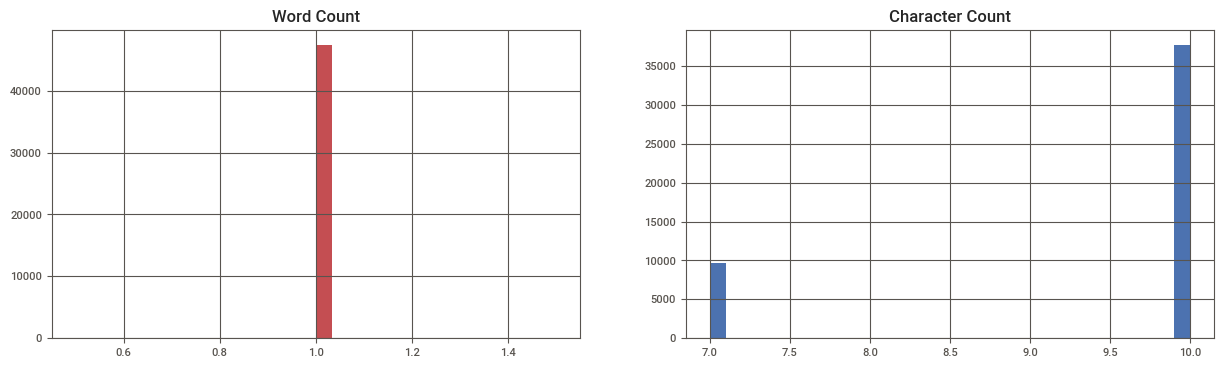

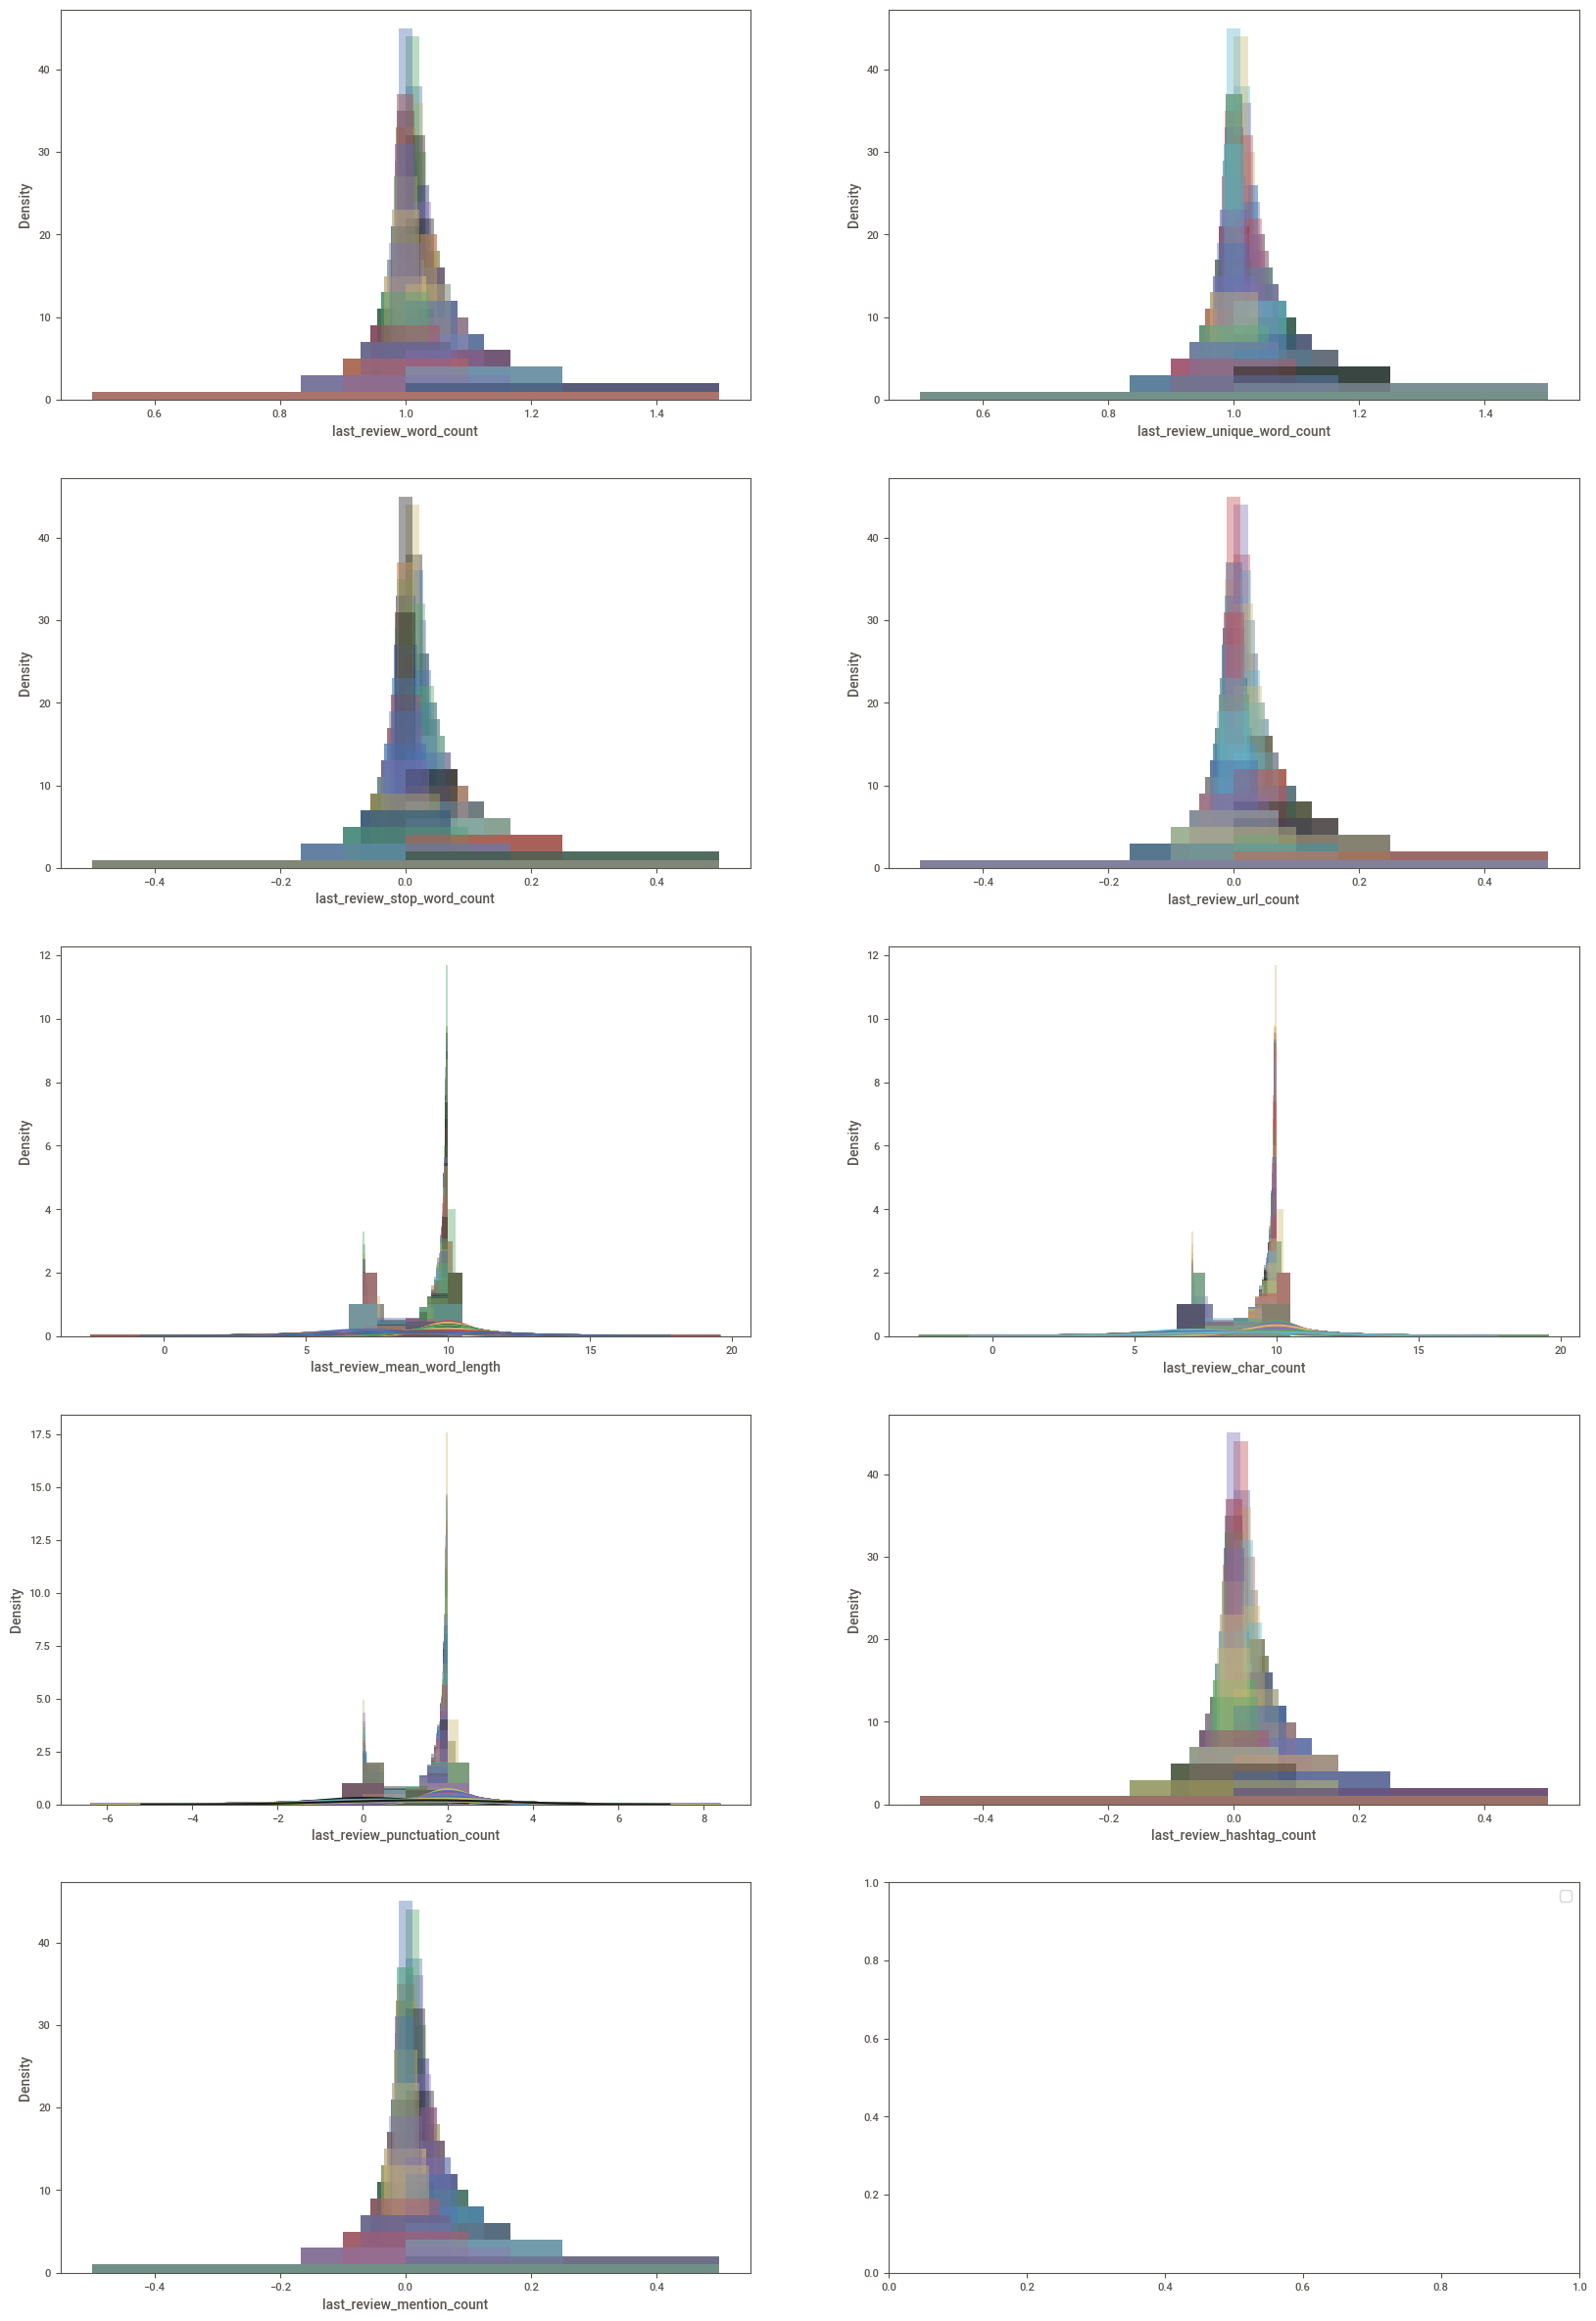

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for last_review column
    Faster text processing using clean_tweets function, since top_num_features exceeds 300
Train data Text cleaning completed. Time taken = 101 seconds
##################    THIS IS FOR BUILD_MODEL = FALSE           #################
Building Model and Pipeline for NLP column = last_review. This will take time...
    Selected the maximum number of features limit = 1
Performing RandomizedSearchCV across 30 params. Optimizing for neg_mean_squared_error
    Using train data = (37913,) and Cross Validation data = (9479,)
Since top_num_features = 300, selecting LightGBM Regressor model. If you need different model, decrease it <300.
Auto_NLP error. Continuing without NLP processing
#######################################################################################
#####  SULOV:  Searching for Uncorrelated List Of Variables in 8 features ############
#############

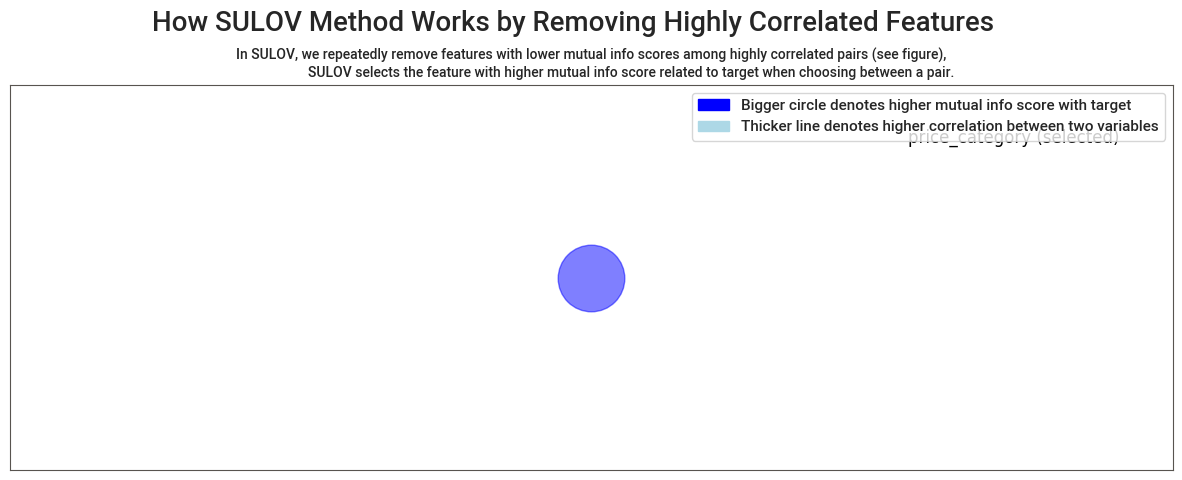

Splitting selected features into float and categorical (integer) variables:
    (8) float variables ...
    (10) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 18 
    Finding Important Features using Boosted Trees algorithm...
        using 18 variables...
        using 14 variables...
        using 10 variables...
        using 6 variables...
        using 2 variables...
Found 15 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  37913 , CV rows =  9479
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Performing MinMax scaling

In [51]:
from autoviml.Auto_ViML import Auto_ViML
import os

# Set environment variables to address multiprocessing issues
os.environ['JOBLIB_MULTIPROCESSING'] = '0'
os.environ['OMP_NUM_THREADS'] = '1'

# Handle missing values for numeric and categorical columns
numeric_cols = auto_data.select_dtypes(include=['number']).columns
categorical_cols = auto_data.select_dtypes(include=['category']).columns

# Fill missing values for numeric columns
auto_data[numeric_cols] = auto_data[numeric_cols].fillna(0)

# Fill missing values for categorical columns
for col in categorical_cols:
    if "missing" not in auto_data[col].cat.categories:
        auto_data[col] = auto_data[col].cat.add_categories("missing")
    auto_data[col] = auto_data[col].fillna("missing")

# Define target and features
target = 'price'  # Replace with your target column
features = auto_data.drop(columns=[target])

# Run AutoVIML without specifying model options
try:
    result = Auto_ViML(
        train=auto_data,
        target=target,
        test='',  # Let AutoVIML handle train-test split
        hyper_param='RS',  # Random search for hyperparameter tuning
        scoring_parameter='r2',  # R-squared metric for regression problems
        KMeans_Featurizer=False,  # Disable KMeans feature generation
        Binning_Flag=False,  # Disable binning to simplify processing
        Add_Poly=False,  # Disable polynomial feature engineering
        verbose=2  # Enable detailed logs for debugging
    )
    if result:
        model, features, train, test = result
        print("AutoVIML execution successful.")
        print("Model:", model)
        print("Features:", features)
    else:
        print("AutoVIML did not return results.")
except Exception as e:
    print(f"Error during AutoVIML execution: {e}")


In [55]:
print("Best Model:", model)

Best Model: RandomForestRegressor()


In [56]:
print("Selected Features:", features)

Selected Features:              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
5          5099          Large Cozy 1 BR Apartment In Midtown East      7322   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name